# Sparse GPs Notebook

In [31]:
import os, sys
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
sys.path.insert(0, parent_dir) 

import numpy as np
from sparse import SparseGPR
import GPy
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
rng = np.random.RandomState(0)

# Generate sample data
noise = 0.5
n_train = 1_000
n_test = 10_000
X = 15 * rng.rand(n_train, 1)

def f(x): return np.sin(x)

y = f(X)
y += 3 * (0.5 - rng.rand(X.shape[0], X.shape[1]))  # add noise
X_plot = np.linspace(0, 20, n_test)[:, None]

In [33]:
def plot_results():
    # Plot results
    plt.figure(figsize=(10, 5))
    lw = 2
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X_plot, np.sin(X_plot), color='navy', lw=lw, label='True')

    plt.plot(X_plot, y_gpr, color='darkorange', lw=lw,
             label='GPR' )
    plt.fill_between(X_plot[:, 0], 
                     (y_gpr - 2*y_std).squeeze(), 
                     (y_gpr + 2*y_std).squeeze(), color='darkorange',
                     alpha=0.2)
    plt.xlabel('data')
    plt.ylabel('target')
    plt.xlim(0, 20)
    plt.ylim(-4, 4)
    plt.title('GPR versus Kernel Ridge')
    plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
    plt.show()

## Sparse GP Model - FITC 

In [37]:
n_inducing = 10
inference = 'fitc'
max_iters = 1_000
n_restarts = 0
verbose = 1

gpr_clf = SparseGPR(
    verbose=verbose, 
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    inference=inference,
    max_iters=max_iters
)

gpr_clf.fit(X, y);

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s01  0002   1.350099e+03   5.970507e+03 
    00s13  0009   1.330586e+03   4.454591e+01 
    00s18  0013   1.329625e+03   8.920621e+00 
    01s18  0288   1.327251e+03   1.735317e-01 
    02s18  0591   1.326219e+03   4.018772e-02 
    02s67  0755   1.326209e+03   4.673157e-04 
Runtime:     02s67
Optimization status: converged - relative reduction in objective

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s06  0006   6.039278e+03   2.654301e+07 
    00s15  0013   1.830319e+03   2.465074e+06 
    00s18  0015   1.830319e+03   8.553233e+05 
    01s01  0254   1.326209e+03   4.812271e-05 
Runtime:     01s01
Optimization status: converged - relative reduction in objective



{'inducing': <matplotlib.collections.PathCollection at 0x14754b0b8>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x14754b588>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x14754b400>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x14754bc18>]}

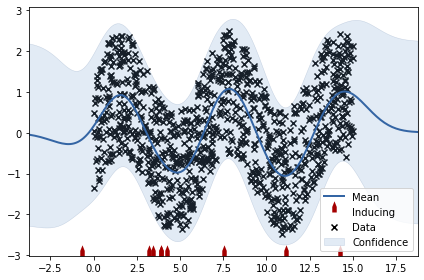

In [38]:
gpr_clf.gp_model.plot()

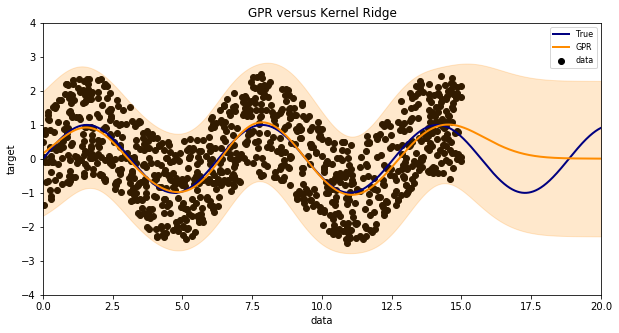

In [39]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

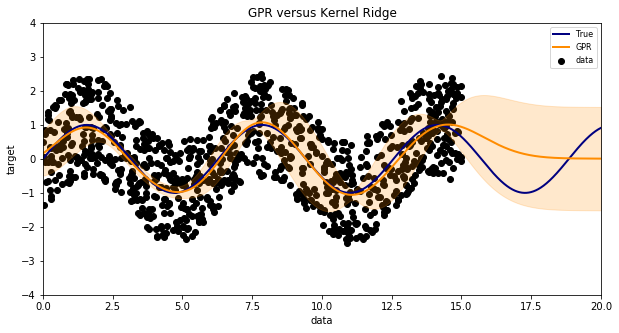

In [40]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()

## Sparse GP - VFE

In [41]:
n_inducing = 10
inference = 'vfe'
max_iters = 1_000
n_restarts = 0
verbose = 1

gpr_clf = SparseGPR(
    verbose=verbose, 
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    inference=inference,
    max_iters=max_iters
)

gpr_clf.fit(X, y);

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s11  0006   1.350331e+03   1.950503e+03 
    00s18  0009   1.345242e+03   1.544365e+03 
    02s20  0201   1.330646e+03   1.889053e-01 
    03s21  0317   1.330622e+03   4.458871e-04 
    03s41  0340   1.330621e+03   5.368016e-05 
Runtime:     03s41
Optimization status: converged - relative reduction in objective

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s14  0008   5.430540e+03   2.643080e+07 
    00s18  0011   2.483393e+03   3.208491e+06 
    00s41  0037   1.330621e+03   6.210770e-05 
Runtime:     00s41
Optimization status: converged - relative reduction in objective



{'inducing': <matplotlib.collections.PathCollection at 0x1490eee10>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x1490d09e8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1490eeef0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1473b4518>]}

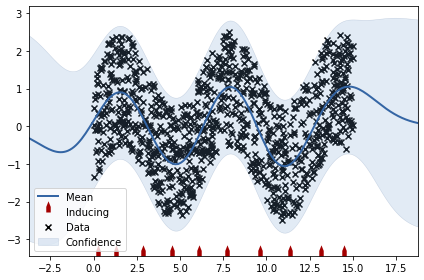

In [45]:
gpr_clf.gp_model.plot()

{'inducing': <matplotlib.collections.PathCollection at 0x1490fd1d0>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x1490fd4e0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1490fd908>]}

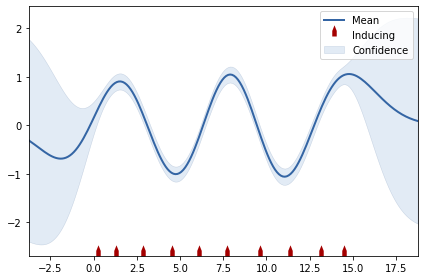

In [46]:
gpr_clf.gp_model.plot_f()

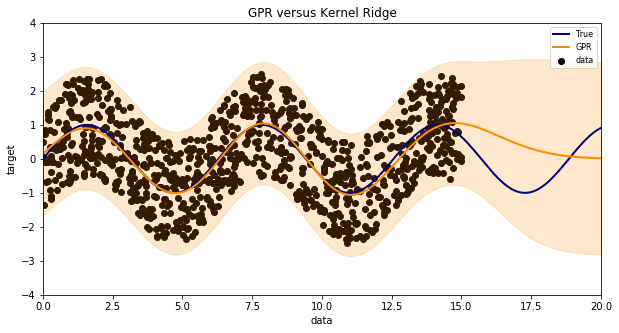

In [43]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

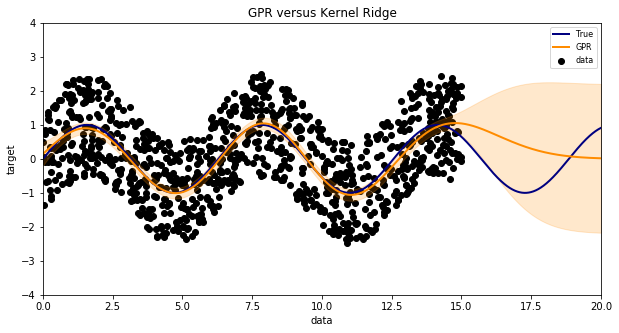

In [44]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()

## Sparse GP - PEP

In [47]:
n_inducing = 10
inference = 'pep'
max_iters = 1_000
n_restarts = 0
verbose = 1
alpha = 0.5

gpr_clf = SparseGPR(
    verbose=verbose, 
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    inference=inference,
    max_iters=max_iters,
    alpha=alpha
)

gpr_clf.fit(X, y);

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s01  0002   1.366238e+03   7.160863e+03 
    00s17  0009   1.332119e+03   4.882844e+01 
    00s19  0010   1.331420e+03   4.882844e+01 
    01s39  0316   1.330366e+03   1.707212e-04 
Runtime:     01s39
Optimization status: converged - relative reduction in objective

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s04  0004   1.343794e+04   1.317819e+09 
    00s09  0008   5.199923e+03   2.264639e+07 
    00s13  0012   2.393933e+03   2.695774e+06 
    00s14  0013   1.557006e+03   2.695774e+06 
    00s19  0016   1.362593e+03   2.743404e+05 
    00s48  0103   1.330366e+03   2.277591e-04 
Runtime:     00s48
Optimization status: converged - relative reduction in objective



{'inducing': <matplotlib.collections.PathCollection at 0x149b31ac8>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x1490ee9b0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x149b31dd8>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x149b4b5f8>]}

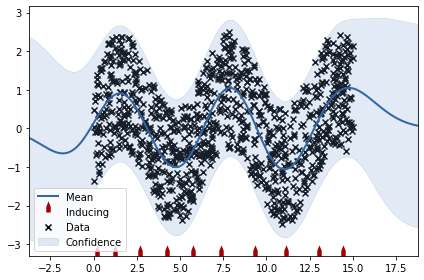

In [48]:
gpr_clf.gp_model.plot()

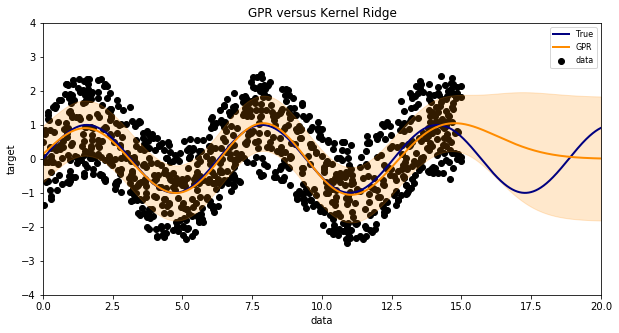

In [12]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

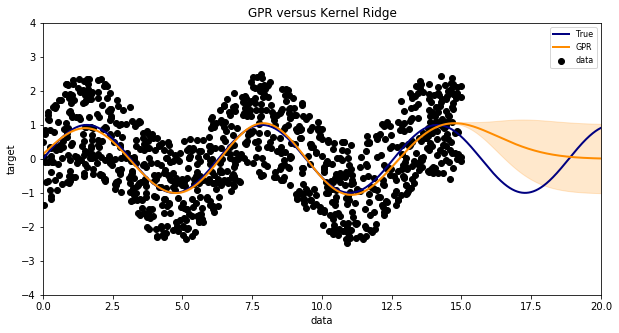

In [13]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()